In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from model import GAN

In [2]:
z = np.random.uniform(-1, 1, size=[1, 100])

In [3]:
tf.reset_default_graph()
model = GAN()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, 'model/gan/model')

INFO:tensorflow:Restoring parameters from model/gan/model


In [4]:
out = sess.run(model.out, feed_dict={model.z: z})
out.shape

(1, 28, 28, 1)

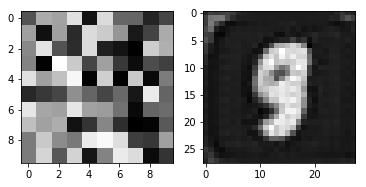

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(z.reshape([10, 10]), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(out[0], axis=-1), cmap='gray');